<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Load libraries
import numpy as np # numerical python for ND array
import matplotlib.pyplot as plt # to make plots and show images
import os

Mounted at /content/drive


In [2]:
####### Read raw file 
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            #print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, bands, lines)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     

# part 1
Open VIS and IR images of painting Madonna with Two Saints


-Open both in Colab, generate gray scale and RGB preview

In [10]:
path = '/content/drive/MyDrive/ASI/savedata/paintings_Madonna_with_two_0015/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
[samples, bands, lines, waves] = read_hdr(vis_hdr)

2144 540 2253


In [11]:
# Read raw
open_path = vis_raw
fopen = open(open_path, "rb")
vis_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
fopen.close()

KeyboardInterrupt: ignored

In [ ]:
spectral_image = np.reshape(vis_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,100,:], cmap='gray', vmin=0, vmax=1255)
plt.show()

In [12]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/ASI/savedata/paintings_Madonna_with_two_0015/capture/paintings_Dadonna_with_two_0015.hdr'

f=open(hdr_path, "r")
filelines = f.readlines()
print(filelines)
#f.close()
wavelengths = np.zeros(540,)
n = 0
for i in range(55, 55+540):
  wavelengths[n] = float(filelines[i].replace(',',''))
  #print(f"{n}:-{wavelengths[n]}nm")
  n = n + 1
#print(wavelengths) 

['ENVI\n', 'description = {\n', 'File Imported into ENVI}\n', 'file type = ENVI\n', '\n', 'sensor type = sCMOS , Lumo - Scanner v1.4.2015-338\n', 'acquisition date = DATE(yyyy-mm-dd): 2016-12-19\n', '\n', 'samples = 2144\n', 'bands = 540\n', 'lines = 2253\n', '\n', 'errors = {none}\n', '\n', 'interleave = bil\n', 'data type = 12\n', 'header offset = 0\n', 'byte order = 0\n', 'x start = 0\n', 'y start = 0\n', 'default bands = {255, 167, 81}\n', '\n', 'himg = {1, 2144}\n', 'vimg = {1, 540}\n', 'hroi = {1, 2144}\n', 'vroi = {1, 540}\n', '\n', 'fps = 78.00\n', 'fps_qpf = 77.83\n', 'tint = 12.002028\n', 'binning = {2, 1}\n', 'trigger mode = Internal\n', 'trigger sync = true\n', 'fodis = {0, 0}\n', 'sensorid = 560007\n', 'acquisitionwindow left = 216\n', 'acquisitionwindow top = 560\n', 'calibration pack = C:/Users/asennus/Documents/Specim/560007_20160620_OL23.scp\n', '\n', 'VNIR temperature = 26.54\n', 'Scb temperature channel1 = 24.95\n', 'Scb temperature channel2 = -57.19\n', 'Scb tempera

In [ ]:
# preview plot RGB image -- 630 nm for red, 532 nm for green, and 465 nm for blue light
vis_RGB = np.empty((2253, 2144, 3)) 
# We go to hdr file and select channels
ch_1 = 250 # Wavelength 630.95nm
ch_2 = 171 # Wavelength 531.59nm
ch_3 = 100 # Wavelength 443.68nm
vis_RGB[:,:,0] = spectral_image[:,ch_1,:]/np.amax(spectral_image[:,ch_1,:]) # RGB in range [0,1]
vis_RGB[:,:,1] = spectral_image[:,ch_2,:]/np.amax(spectral_image[:,ch_2,:])
vis_RGB[:,:,2] = spectral_image[:,ch_3,:]/np.amax(spectral_image[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_RGB)
plt.show()


In [ ]:
# IR image 
irpath = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture/IR_IR1_0019.raw'

fopen = open(irpath, "rb") # Open file to read in Python
irraw = np.fromfile(fopen, dtype=np.uint16) #data type 12
fopen.close() # Close opened file
#print(irraw.shape) # print shape of 1D array we have read

samples = 320
bands = 256
lines = 943
spectral_image_ir = np.reshape(irraw, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case
np.rot90(spectral_image_ir)
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_image_ir[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image , vmin=0, vmax=1255
plt.show()

In [ ]:
hdr_path_ir = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture/IR_IR1_0019.hdr'

f=open(hdr_path_ir, "r")
filelines_ir = f.readlines()
f.close()
#print(filelines)
for fileline in filelines_ir:
    # read waves   
    n = 0
    for fileline in filelines_ir:
        if 'th = {' in fileline.lower():
          
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    wavelengths_ir = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        wavelengths_ir[n] = float(filelines_ir[i].replace(',',''))
        #print(waves[n])
        n = n + 1 
# for i in range(len(wavelengths_ir)):
#   print(f"{i}:-{wavelengths_ir[i]}nm")
          


In [ ]:
# preview plot RGB image(false color)
ir_RGB = np.empty((943, 320, 3)) 
# We go to hdr file and select channels
ch_1 = 90 
ch_2 = 140 
ch_3 = 210 
ir_RGB[:,:,0] = spectral_image_ir[:,ch_1,:]/np.amax(spectral_image_ir[:,ch_1,:]) # RGB in range [0,1]
ir_RGB[:,:,1] = spectral_image_ir[:,ch_2,:]/np.amax(spectral_image_ir[:,ch_2,:])
ir_RGB[:,:,2] = spectral_image_ir[:,ch_3,:]/np.amax(spectral_image_ir[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_RGB)
plt.show()


In [ ]:
white_hdr

-Consider white sample from the Capture folder and try to make white correction based on single white spectrum

In [ ]:
###############################################
# Read White
[samples, bands, lines, waves] = read_hdr(white_hdr)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 100
plt.imshow(white_image[:,100,:], cmap="gray", vmin=0, vmax=4)#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark_image[:,200,:], cmap="gray", vmin=0, vmax=2)#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()


In [ ]:
for i in range(1,200):
  plt.plot(white_image[i,100,:],'b')

white_av = numpy.sum(dark_image, axis = 0)/234 # get average for White
print(white_av.shape)
plt.rcParams['figure.dpi'] = 200
plt.plot(white_av[100,:],'r')
plt.yticks(range(0, 190, 10))
plt.title("White sample profile")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Raw data from camera, a.u.')
plt.ylabel('Samples')
plt.show()

# part 2
Open ENVI from Japanese spectral camera


In [39]:
path2 = '/content/drive/MyDrive/ASI/savedata/colorChecker.nh7'
fopen = open(path2, "rb")
raw = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
print(f"size: {raw.shape}")
fopen.close()

size: (197918720,)


Known the sensor size is 1280x1024, and the data type is unit16

In [27]:
lines = 1024
samples = 1280
bands = int(197918720/1280/1024) # 151
spectral_image = np.reshape(raw, (lines, bands, samples))

spectral_image.shape:  (1024, 151, 1280)


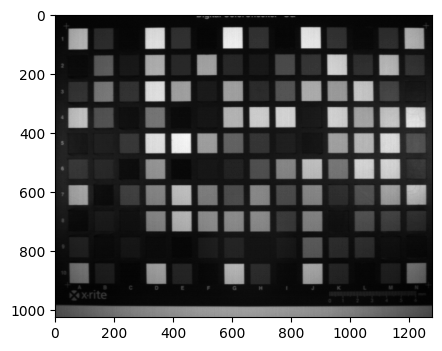

In [35]:
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,60,:], cmap='gray')
plt.show()

# part 3
Open ENVI from Japanese spectral camera

In [42]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/ASI/savedata/Image of coin (Senop camera)/HSI_snapshot__20212101144836.hdr'
f=open(hdr_path, "r")
filelines = f.readlines()
print(filelines)


['ENVI\n', 'description = Senop HSC-2 7002730\n', 'wavelength units = nm\n', 'samples = 1024\n', 'lines = 1024\n', 'file type = ENVI\n', 'interleave = BSQ\n', 'byte order = 1\n', 'data type = 12\n', 'senop sequence name = Sequence 1\n', 'bands = 18\n', 'senop acquisition mode = 12\n', 'acquisition time = 2021-01-21T12:48:31.483730000Z\n', 'wavelength = {500.0,526.5,552.9,579.4,605.9,632.4,658.8,685.3,711.8,738.2,764.7,791.2,817.6,844.1,870.6,897.1,923.5,950.0}\n', 'fwhm = {0.0,10.0,10.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,9.0,10.0,9.0,9.0,0.0,0.0}\n', 'data gain values = {0.000000,0.000114,0.000110,0.000116,0.000121,0.000141,0.000125,0.000114,0.000122,0.000133,0.000139,0.000168,0.000120,0.000151,0.000166,0.000215,0.000000,0.000000}\n', 'solar irradiance = {0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000}\n', 'senop sequence order = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,

ValueError: ignored

In [38]:
samples = 1024
lines = 1024
bands = 18

In [39]:
path3 = '/content/drive/MyDrive/ASI/savedata/Image of coin (Senop camera)/HSI_snapshot__20212101144836.dat'
fopen = open(path3, "rb")
raw = np.fromfile(fopen, dtype='>u2')
print(f"size: {raw.shape}")
fopen.close()

size: (18874368,)


spectral_image.shape:  (1024, 18, 1024)


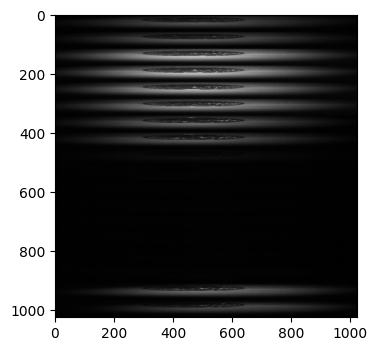

In [40]:
spectral_image = np.reshape(raw, (lines, bands, samples))

print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,10,:], cmap='gray')
plt.show()

#part 4
Save ENVI spectral image with interleave = bil/bip

In [53]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/ASI/Lectures+Exercises/Lecture 2/Spectral images/Colorchecker 121 ms (for Freelook demo)/capture/Colorchecker.hdr'
f=open(hdr_path, "r")
filelines = f.readlines()
print(filelines)
[samples, bands, lines, waves] = read_hdr(hdr_path)

['ENVI\n', 'description = {Data recorded with Specim IQ}\n', 'samples = 512\n', 'lines = 512\n', 'bands = 204\n', 'header offset = 0\n', 'file type = ENVI\n', 'data type = 12\n', 'interleave = BIL\n', 'sensor type = SPECIM IQ\n', 'byte order = 0\n', 'default bands = {70,53,19}\n', 'latitude = 0.00000000\n', 'longitude = 0.00000000\n', 'acquisition date = 29-09-2020\n', 'errors = none\n', 'binning = {1,1}\n', 'tint = 121\n', 'fps = 8.26446\n', 'wavelength = {\n', '    397.32,\n', '    400.20,\n', '    403.09,\n', '    405.97,\n', '    408.85,\n', '    411.74,\n', '    414.63,\n', '    417.52,\n', '    420.40,\n', '    423.29,\n', '    426.19,\n', '    429.08,\n', '    431.97,\n', '    434.87,\n', '    437.76,\n', '    440.66,\n', '    443.56,\n', '    446.45,\n', '    449.35,\n', '    452.25,\n', '    455.16,\n', '    458.06,\n', '    460.96,\n', '    463.87,\n', '    466.77,\n', '    469.68,\n', '    472.59,\n', '    475.50,\n', '    478.41,\n', '    481.32,\n', '    484.23,\n', '    4

size: (53477376,)
spectral_image.shape:  (512, 204, 512)


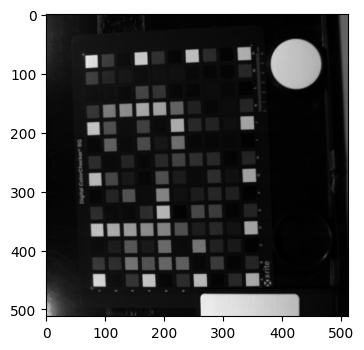

In [47]:
path4 = '/content/drive/MyDrive/ASI/Lectures+Exercises/Lecture 2/Spectral images/Colorchecker 121 ms (for Freelook demo)/capture/Colorchecker.raw'
fopen = open(path4, "rb")
raw = np.fromfile(fopen, dtype=np.uint16)
print(f"size: {raw.shape}")
fopen.close()

spectral_image = np.reshape(raw, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,10,:], cmap='gray')
plt.show()

In [51]:
rotated_image = np.rot90(spectral_image, k=1, axes=(1,2))
